In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [50]:
df = web.DataReader("AAPL" , data_source='yahoo' , start='2012-01-01' , end='2017-12-17')

In [51]:
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2017-12-11,172.889999,168.789993,169.199997,172.669998,35273800.0,166.749649
2017-12-12,172.389999,171.460007,172.149994,171.699997,19409200.0,165.812897
2017-12-13,173.539993,172.000000,172.500000,172.270004,23818400.0,166.363358


In [52]:
df.shape

(1500, 6)

In [53]:
df.head

<bound method NDFrame.head of                   High         Low  ...      Volume   Adj Close
Date                                ...                        
2012-01-03   58.928570   58.428570  ...  75555200.0   50.857235
2012-01-04   59.240002   58.468571  ...  65005500.0   51.130558
2012-01-05   59.792858   58.952858  ...  67817400.0   51.698215
2012-01-06   60.392857   59.888573  ...  79573200.0   52.238651
2012-01-09   61.107143   60.192856  ...  98506100.0   52.155792
...                ...         ...  ...         ...         ...
2017-12-11  172.889999  168.789993  ...  35273800.0  166.749649
2017-12-12  172.389999  171.460007  ...  19409200.0  165.812897
2017-12-13  173.539993  172.000000  ...  23818400.0  166.363358
2017-12-14  173.130005  171.649994  ...  20476500.0  166.315079
2017-12-15  174.169998  172.460007  ...  40169300.0  168.005066

[1500 rows x 6 columns]>

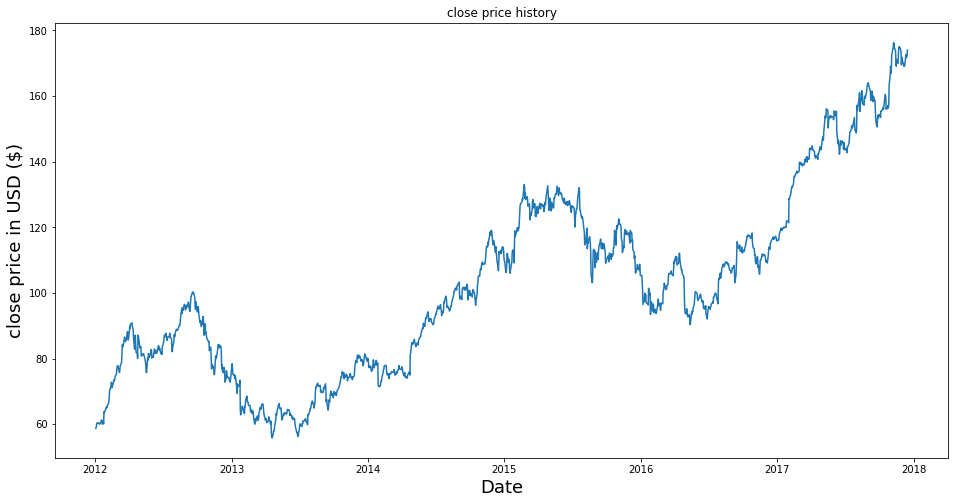

In [54]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in USD ($)' , fontsize=18)
plt.show()

In [55]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02455078],
       [0.02717192],
       [0.03261577],
       ...,
       [0.96704026],
       [0.96662512],
       [0.98115397]])

In [57]:
train_data = scaled_data[0:training_data_len , :]

In [58]:
x_train = []
y_train = []
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.02455078, 0.02717192, 0.03261577, 0.03779872, 0.03700408,
       0.03879498, 0.03797662, 0.03660082, 0.03472692, 0.04052659,
       0.04575698, 0.04414398, 0.03530807, 0.04374072, 0.03543852,
       0.06657177, 0.06416412, 0.06730712, 0.07410305, 0.07821855,
       0.07787461, 0.07660558, 0.08201387, 0.0871019 , 0.09286604,
       0.10217637, 0.12173397, 0.12203047, 0.13291824, 0.14105436,
       0.12707106, 0.13245566, 0.13234893, 0.14744709, 0.14530034,
       0.14927352, 0.15641341, 0.16038665, 0.17183182, 0.18016962,
       0.1825772 , 0.18341932, 0.16916327, 0.16572374, 0.16623376,
       0.17963585, 0.18340747, 0.19150799, 0.21060308, 0.23607898,
       0.23131114, 0.23132298, 0.24974203, 0.2555061 , 0.25140244,
       0.24765463, 0.24375259, 0.25671585, 0.26561111, 0.26933523])]
[0.2601316233609075]



In [60]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [61]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [62]:
model = Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [63]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [64]:
 model.fit(x_train,y_train , batch_size=1,epochs=1)

Epoch 1/1
1140/1140 [==============================] - 47s 41ms/step - loss: 0.0020


In [65]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


In [66]:
x_test = np.array(x_test)

In [67]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [68]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [69]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.13566085815429688

In [70]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


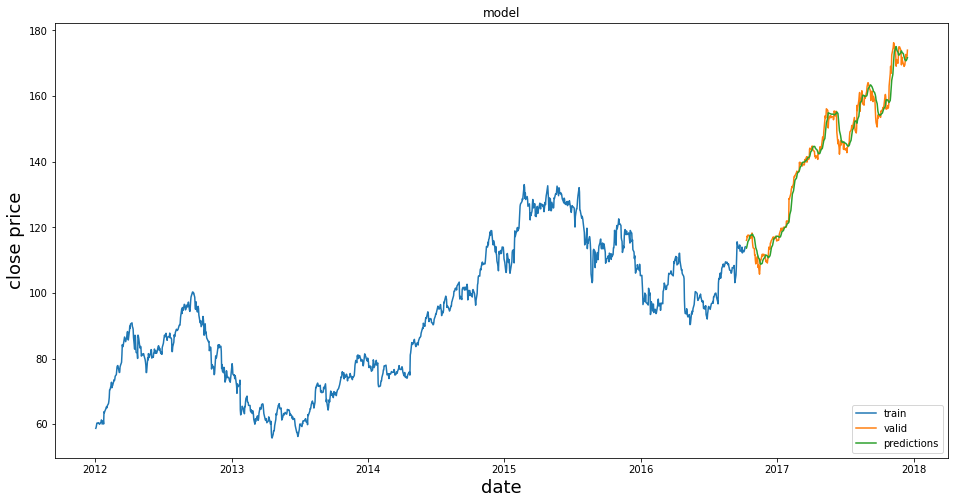

In [71]:
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','valid','predictions'],loc='lower right')

In [72]:
valid

,Close,predictions
Date,,
2016-10-10,116.050003,113.653687
2016-10-11,116.300003,114.011116
2016-10-12,117.339996,114.485634
2016-10-13,116.980003,115.091026
2016-10-14,117.629997,115.666649
...,...,...
2017-12-11,172.669998,170.717300
2017-12-12,171.699997,170.840363
2017-12-13,172.270004,171.050140
